## Group: 047

### Members:
 - Nipun Gupta (2021fc04426)
 - Aiswarya S Parvathi (2021fc04430)
 - Vengadesh S (2021fc04424)

### Introduction to Data Science Assignment - Super Market Sales Analytics

The dataset is **Supermarket_Sales_Dataset.csv**. 

This dataset contains various attributes of supermarket like Invoice Id, Branch, City, Customer Type, Gender, Product Type, Unit Price, Quantity, Tax, Selling Price, Date, Time, Payment Type, Cost Price, Gross Income, Rating.

The objective is to determine the **Rating** of a product.

For this requirement, the attributes like **Invoice ID**, **Branch** and **Time** will not play an important role in purchasing and rating of a product. So these attributes need not be read from the csv dataset.

For the attribute **Date**, the day and the year may not be important but the month might be important as the month/season of a year may impact the purchasing of a product. So we will have to analyse this

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv('Supermarket_Sales_Dataset.csv', usecols = ['City', 'Customer Type', 'Gender', 'Product Type', 'Unit Price', 'Quantity', 'Tax ', 'Selling Price', 'Date', 'Payment Type', 'Cost Price', 'Gross Income', 'Rating'])
df = pd.read_csv('Supermarket_Sales_Dataset.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Debit card,522.83,26.1415,9.1
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Debit card,465.76,23.2880,8.4
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Debit card,604.17,30.2085,5.3


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Invoice ID       1000 non-null object
Branch           1000 non-null object
City             1000 non-null object
Customer Type    1000 non-null object
Gender           1000 non-null object
Product Type     1000 non-null object
Unit Price       1000 non-null float64
Quantity         1000 non-null int64
Tax              1000 non-null float64
Selling Price    1000 non-null float64
Date             1000 non-null object
Time             1000 non-null object
Payment Type     1000 non-null object
Cost Price       1000 non-null float64
Gross Income     1000 non-null float64
Rating           1000 non-null float64
dtypes: float64(6), int64(1), object(9)
memory usage: 125.1+ KB


The dataset has **1000 rows** and **16 columns**. It can also be seen that the dataset has no missing values

In [5]:
df.shape

(1000, 16)

In [6]:
df.describe()

,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


From ther above description of the dataset, the following conclusions can be drawn:

 - The **maximum unit price** of a product is approx 100 and **minimum unit price** of a product is approx 10
 
 - The **maximum quanity** of a product purchased is 10 and **minimum quantity** of a product purchased is 1
 
 - The **maximum tax price** levied on a product is approx 50 and **minimum tax price** levied on a product is approx 0.51
 
 - The **maximum selling price** of a product is approx 1043 and **minimum selling price** of a product is approx 11
  
 - The **maximum cost price** of a product is 993 and **minimum cost price** of a product is approx 10
 
 - The **maximum gross income** of a customer is approx 50 and **minimum gross income** of a customer is approx 0.51
 
 - The **maximum rating** of a product is 10 and **minimum rating** of a product is approx 4 

Analysing **Branch** column

In [7]:
df['Branch'].nunique()

3

The **Branch** column has 3 unique values

Value count for feature Branch
A    340
B    332
C    328
Name: Branch, dtype: int64


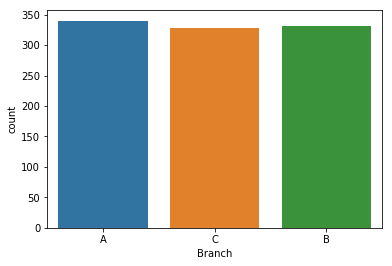

In [8]:
print("Value count for feature Branch")
print(df['Branch'].value_counts())
sns.countplot('Branch', data=df)

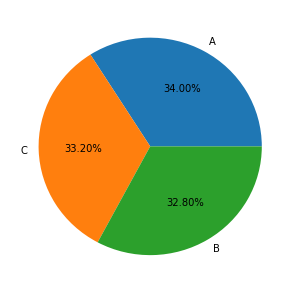

In [9]:
plt.figure(figsize=(5,5))
plt.pie(df['Branch'].value_counts(), labels=df['Branch'].unique(), autopct='%0.2f%%')
plt.show()

Analysing **City** column

In [10]:
df['City'].nunique()

3

Value count for feature City
Bangalore    340
Mangalore    332
Mysore       328
Name: City, dtype: int64


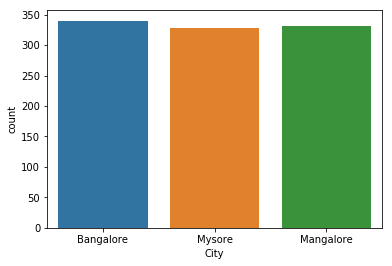

In [11]:
print("Value count for feature City")
print(df['City'].value_counts())
sns.countplot('City', data=df)

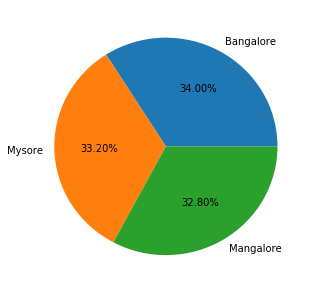

In [12]:
plt.figure(figsize=(5,5))
plt.pie(df['City'].value_counts(), labels=df['City'].unique(), autopct='%0.2f%%')
plt.show()

Analysing **customer Type** column

In [13]:
df['Customer Type'].nunique()

2

Value count for feature Customer Type
Member    501
Normal    499
Name: Customer Type, dtype: int64


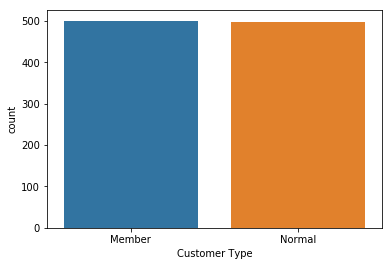

In [14]:
print("Value count for feature Customer Type")
print(df['Customer Type'].value_counts())
sns.countplot('Customer Type', data=df)

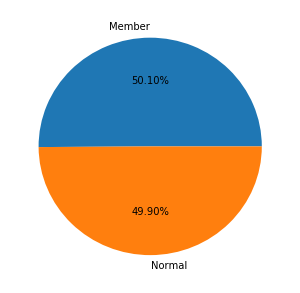

In [15]:
plt.figure(figsize=(5,5))
plt.pie(df['Customer Type'].value_counts(), labels=df['Customer Type'].unique(), autopct='%0.2f%%')
plt.show()

Analysing **Gender** column

In [16]:
df['Gender'].nunique()

2

Value count for feature Gender
Female    501
Male      499
Name: Gender, dtype: int64


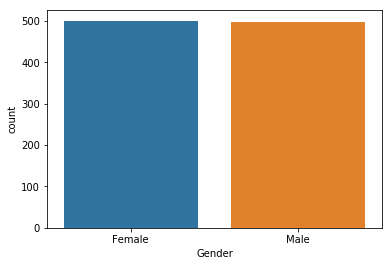

In [17]:
print("Value count for feature Gender")
print(df['Gender'].value_counts())
sns.countplot('Gender', data=df)

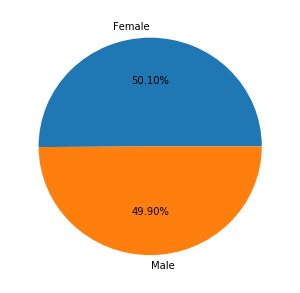

In [18]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%0.2f%%')
plt.show()

Analysing **Product Type** column

In [19]:
df['Product Type'].nunique()

6

Value count for feature Product Type
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product Type, dtype: int64


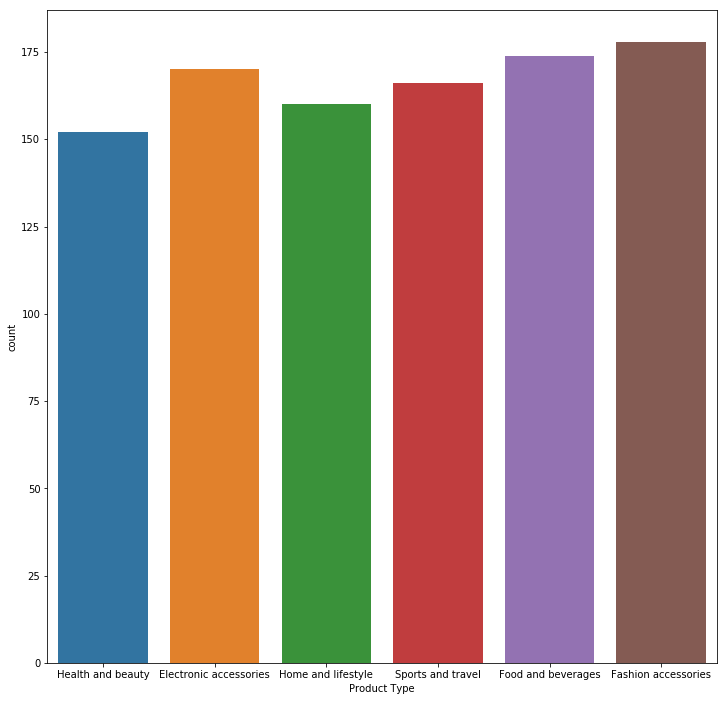

In [20]:
print("Value count for feature Product Type")
print(df['Product Type'].value_counts())
plt.figure(figsize=(12,12))
sns.countplot('Product Type', data=df)

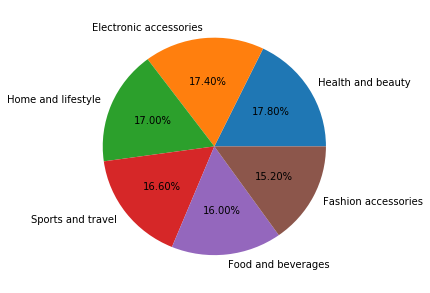

In [21]:
plt.figure(figsize=(5,5))
plt.pie(df['Product Type'].value_counts(), labels=df['Product Type'].unique(), autopct='%0.2f%%')
plt.show()

Analysing **Payment Type** column

In [22]:
df['Payment Type'].nunique()

3

Value count for feature Payment Type
Debit card     345
Cash           344
Credit card    311
Name: Payment Type, dtype: int64


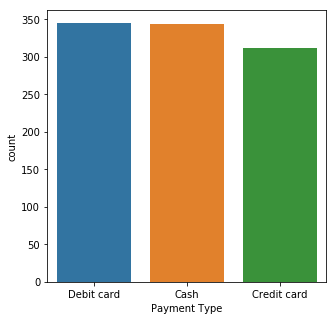

In [23]:
print("Value count for feature Payment Type")
print(df['Payment Type'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('Payment Type', data=df)

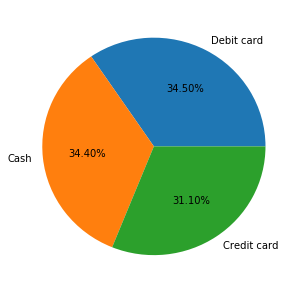

In [24]:
plt.figure(figsize=(5,5))
plt.pie(df['Payment Type'].value_counts(), labels=df['Payment Type'].unique(), autopct='%0.2f%%')
plt.show()

Analysis of date and Time variables

## Extracting continuous features from the dataframe

In [25]:
continuous_features = [feature for feature in df.select_dtypes(np.number).columns]

In [53]:
print(continuous_features)

['Unit Price', 'Quantity', 'Tax ', 'Selling Price', 'Cost Price', 'Gross Income', 'Rating']


### Plotting Boxplots to check for univariate outliers

In [30]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(y=dataset[feature], data=dataset, color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

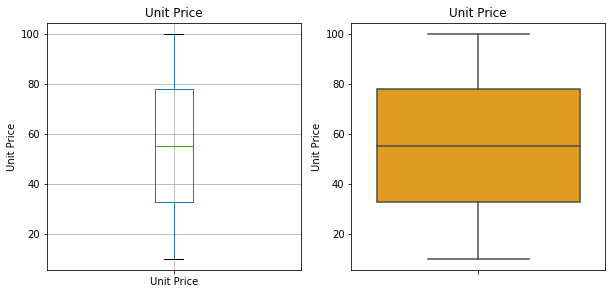

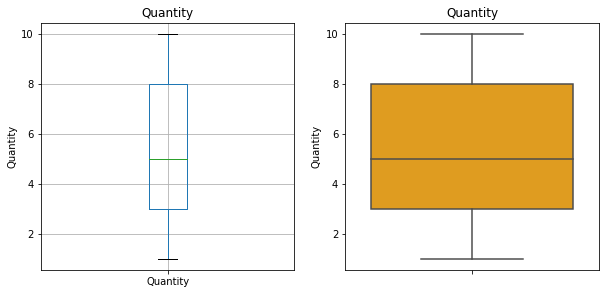

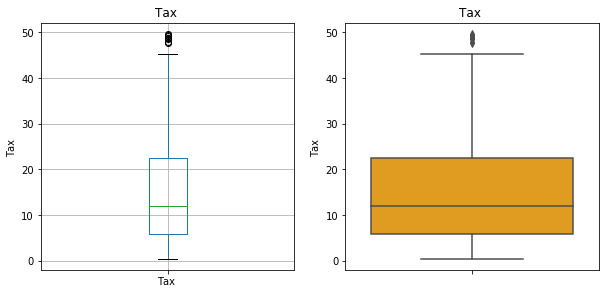

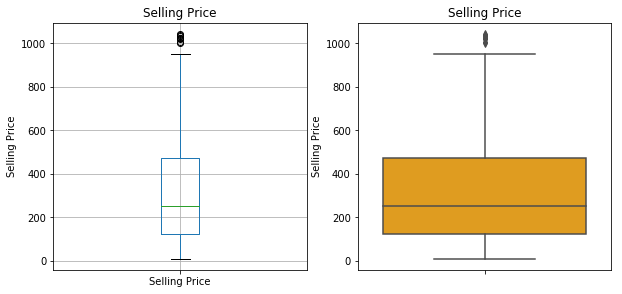

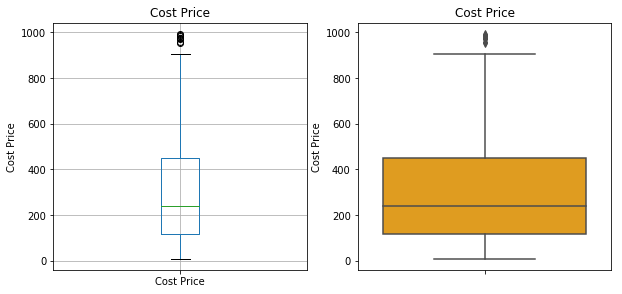

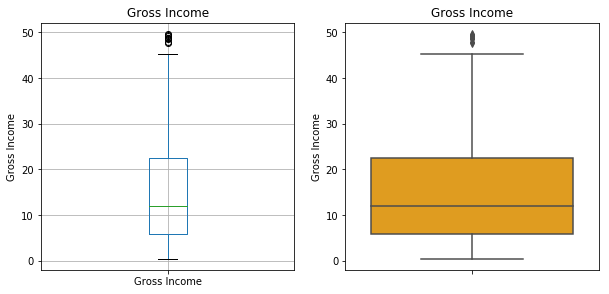

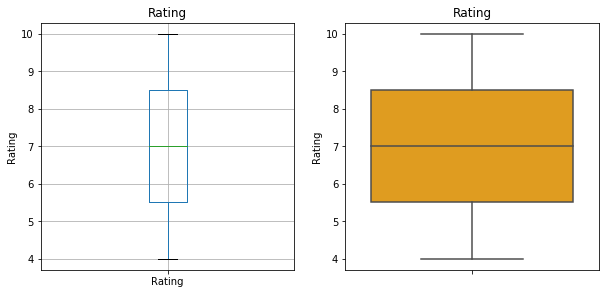

In [31]:
create_boxplots(df, continuous_features)

The boxplots reveal that the features **Tax**, **Selling Price**, **cost Price** and **Gross Income** have outliers

## Plotting histograms and distplots

In [32]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.distplot(df[feature])
        plt.xlabel(feature)
        plt.show()

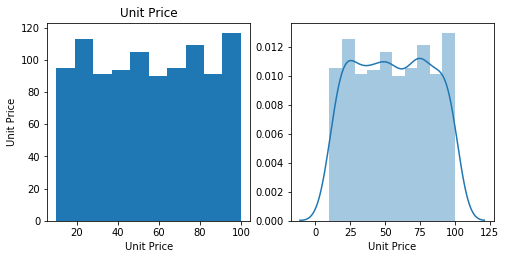

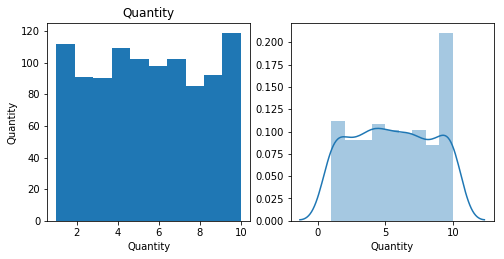

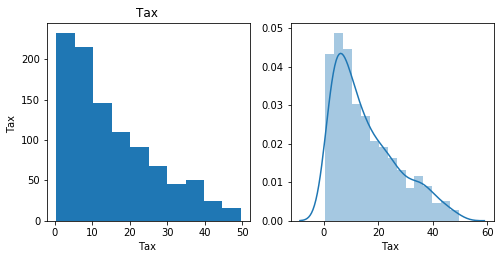

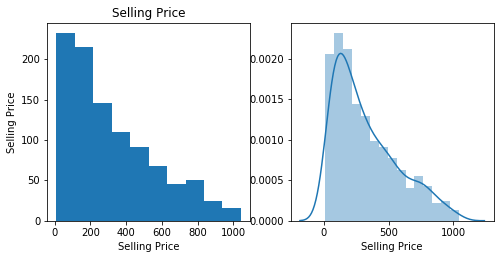

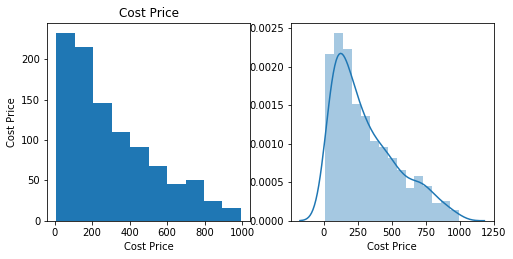

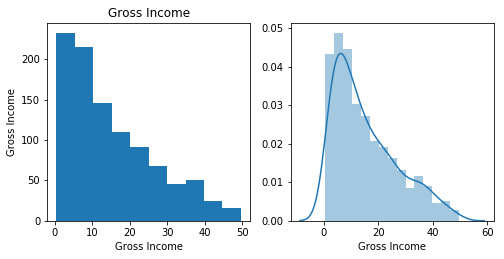

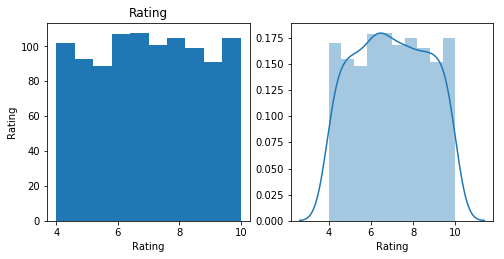

In [33]:
create_histograms_distplots(df, continuous_features)

The histograms and distplots reveal where the majority values are concentrated and in which direction is the atrribute skewed.

The features **Tax**, **Selling Price**, **Cost Price** and **Gross Income** are positively skewed

The feature **Quantity** is negatively skewed

## Correlation analysis

In [34]:
df.corr()

,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating
Unit Price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Selling Price,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Cost Price,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Gross Income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


### Plotting Heatmap to perform correlation analysis

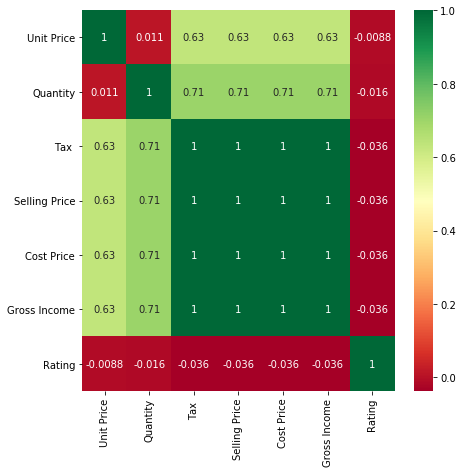

In [38]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of pearson correlation coefficient for the respective combinations of the features. The pearson correlation coefficient varies from -1 to 1. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the feature selection. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

It can be observed the features **Tax**, **Selling Price**, **Cost Price** and **Gross Income** are strongly related to one another with **pearson correlation coefficient** value of **1**

## Plotting jointplots

In [39]:
def create_jointplots(dataset, feature_list):
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.jointplot(x=feature, y=bivariate_feature, data=dataset, kind='hex')

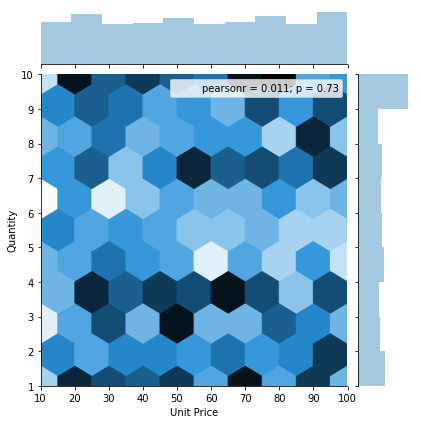

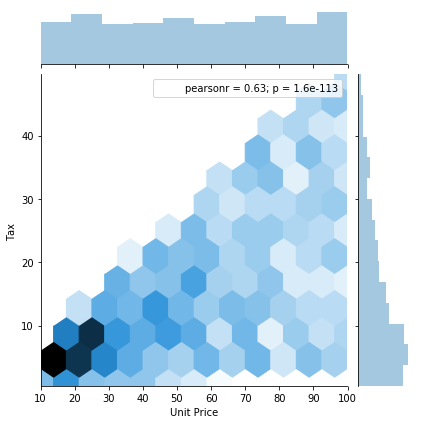

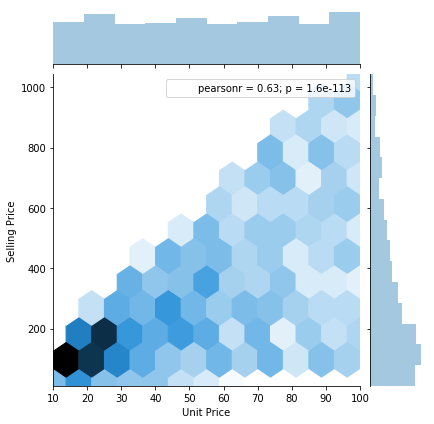

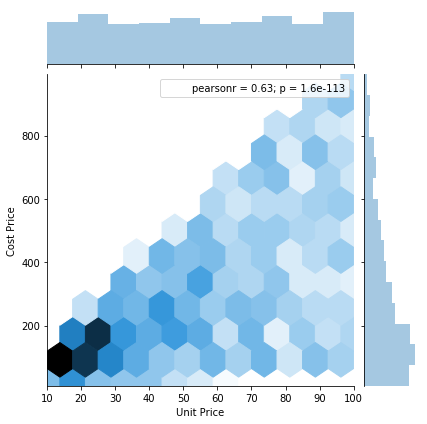

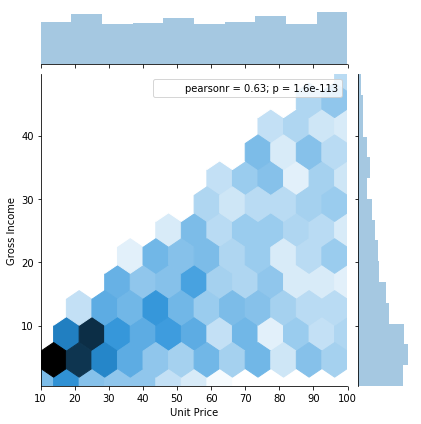

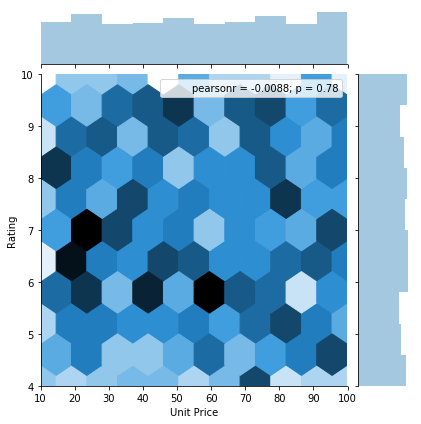

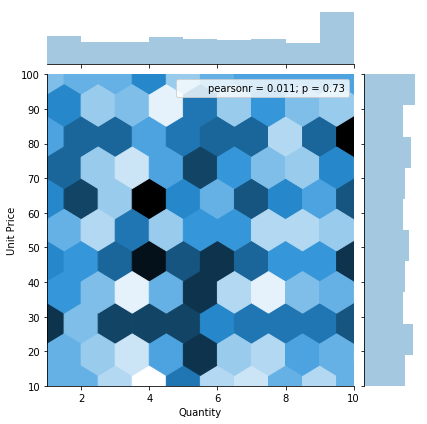

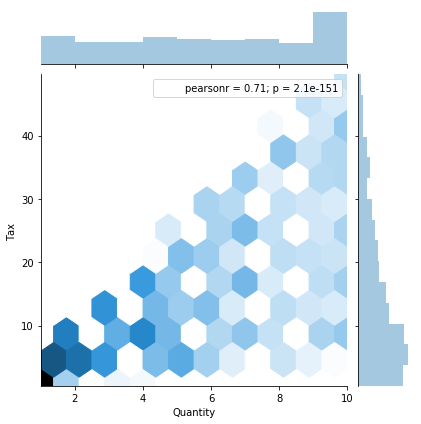

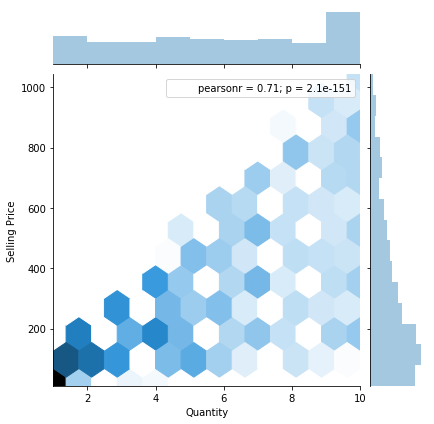

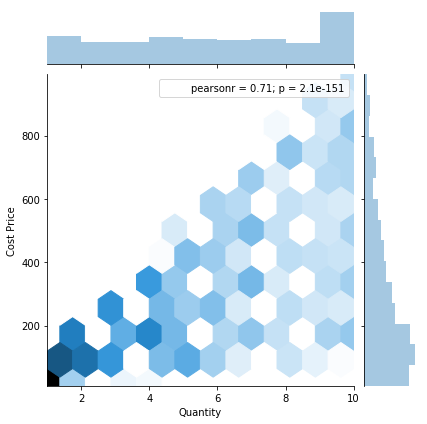

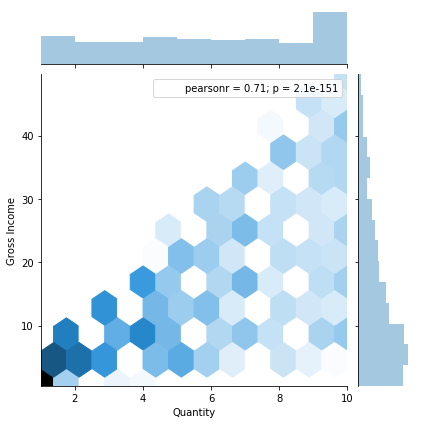

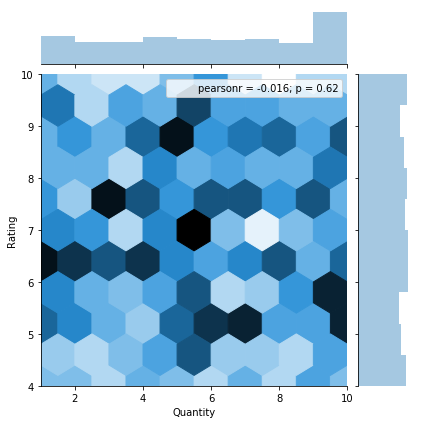

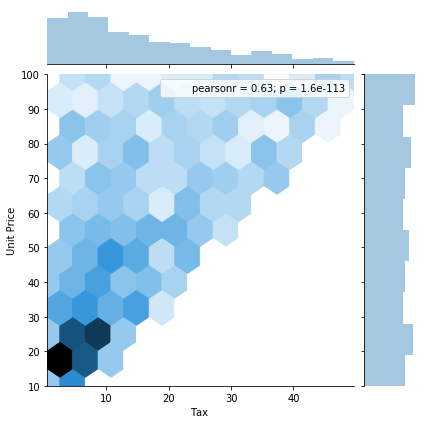

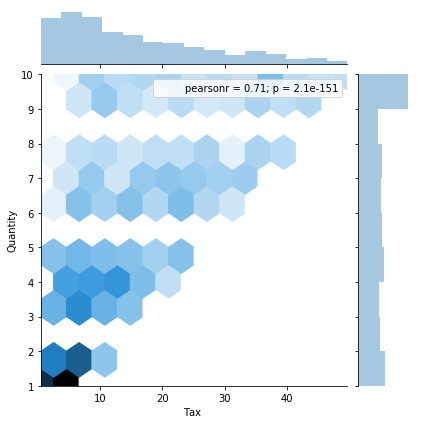

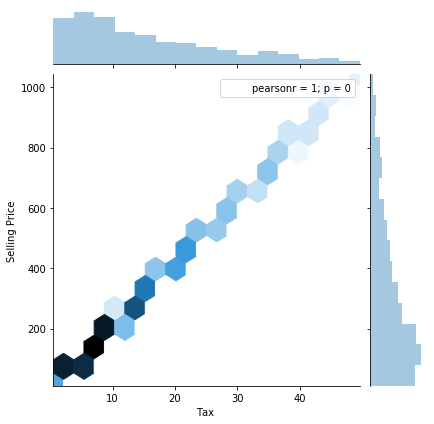

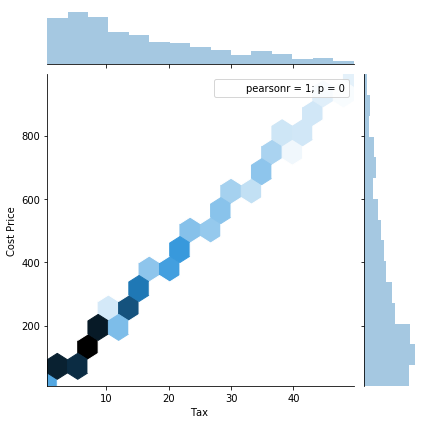

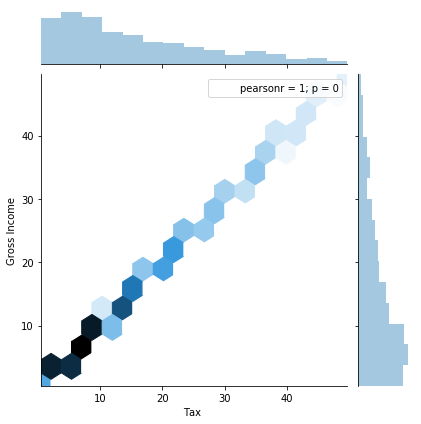

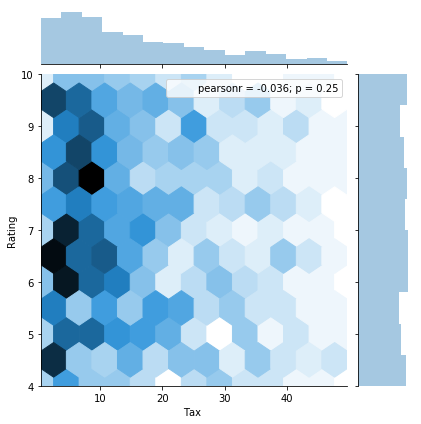

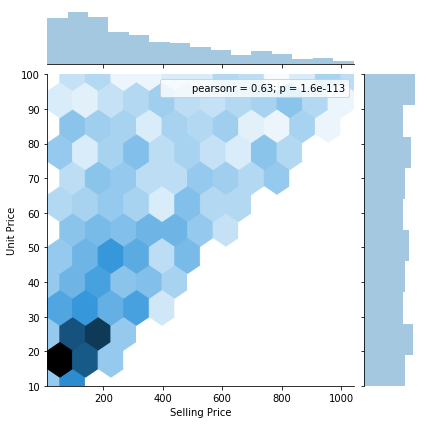

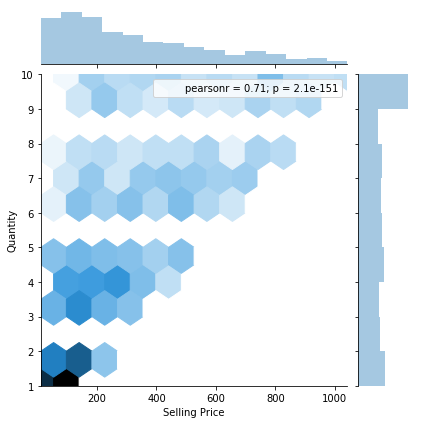

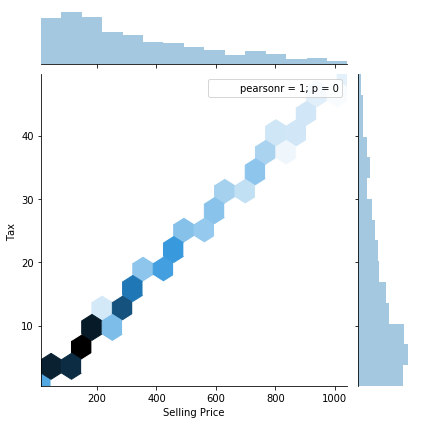

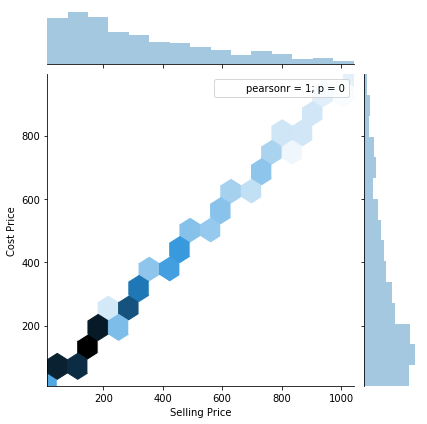

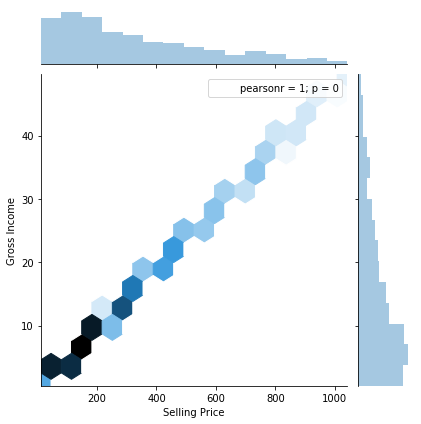

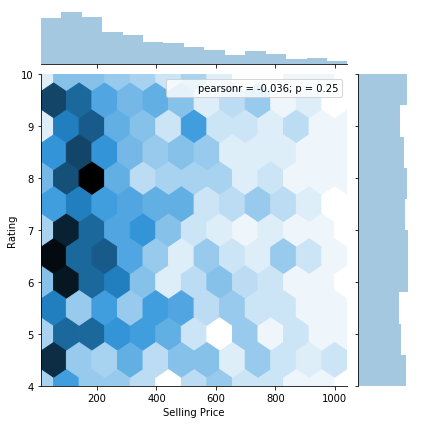

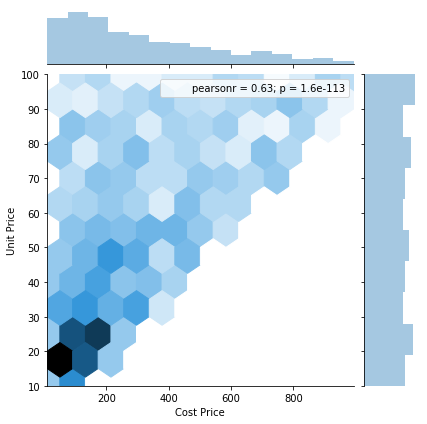

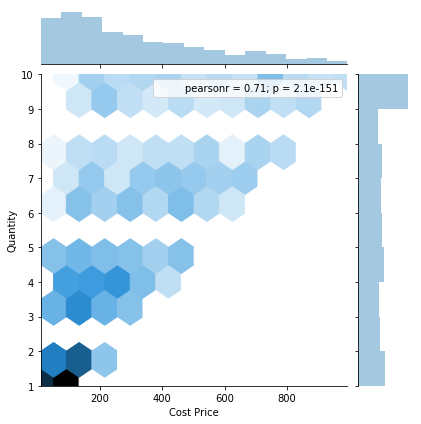

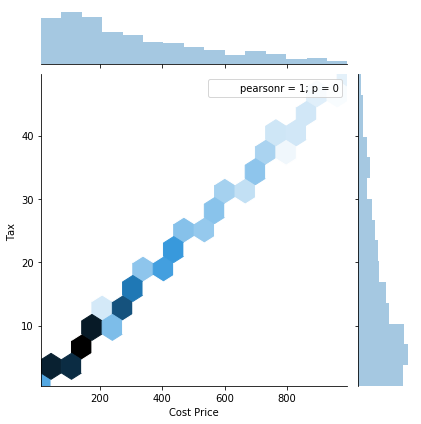

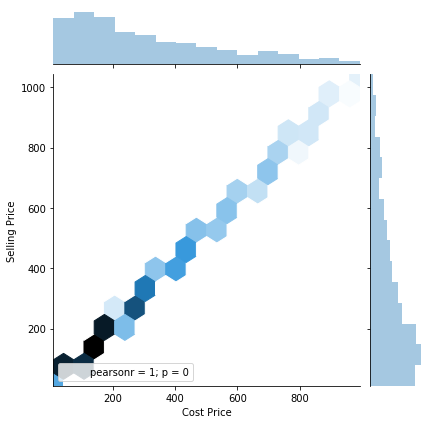

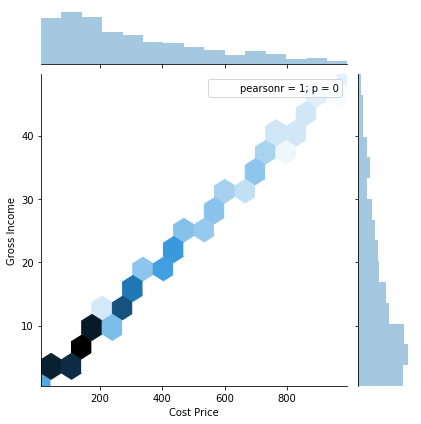

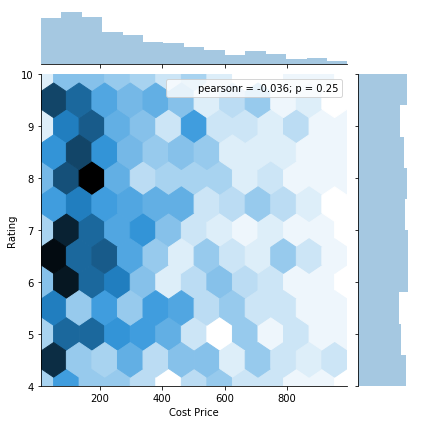

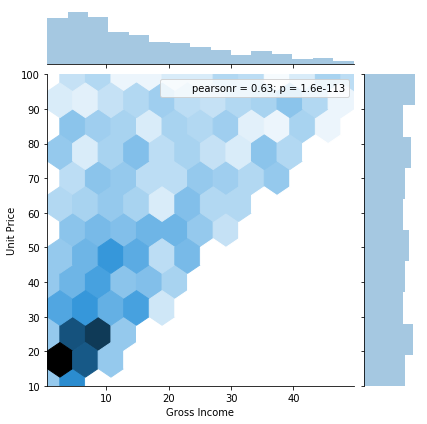

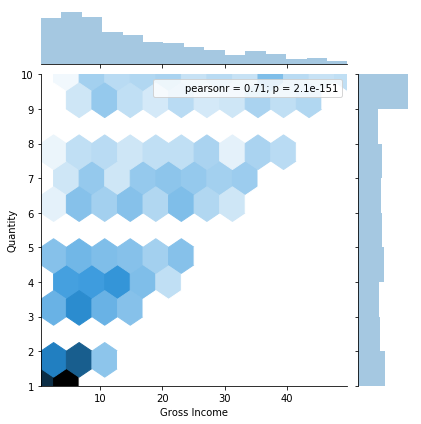

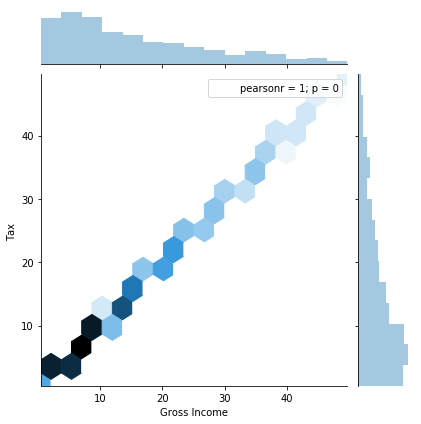

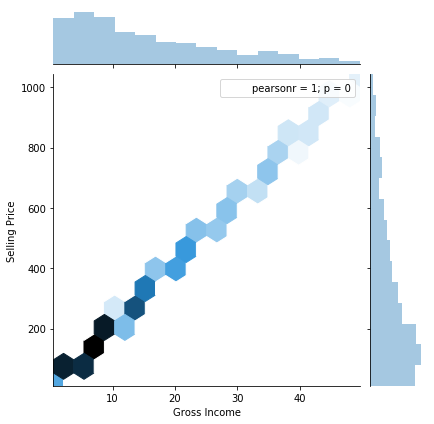

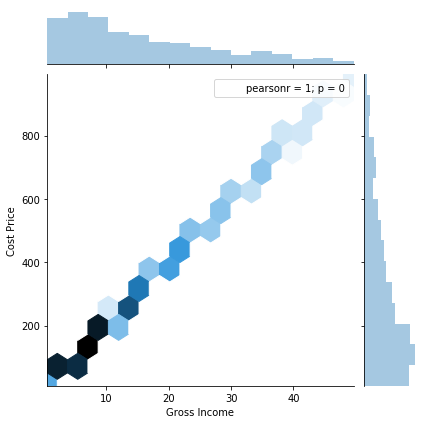

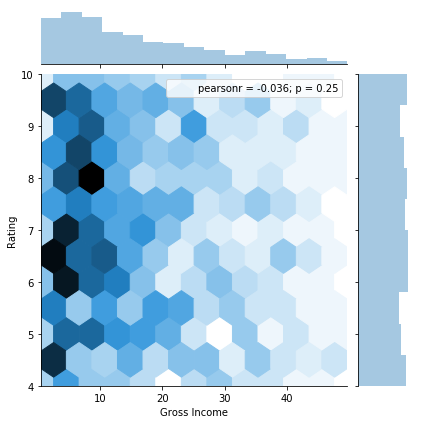

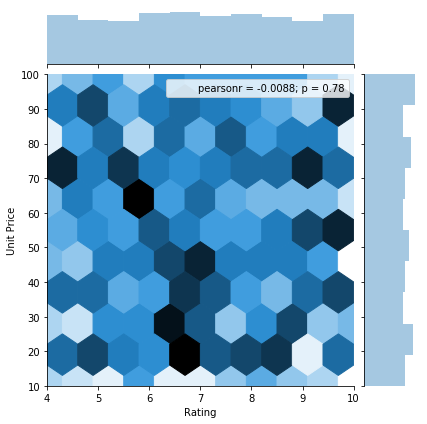

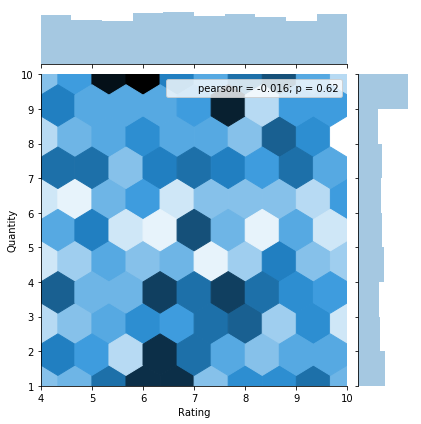

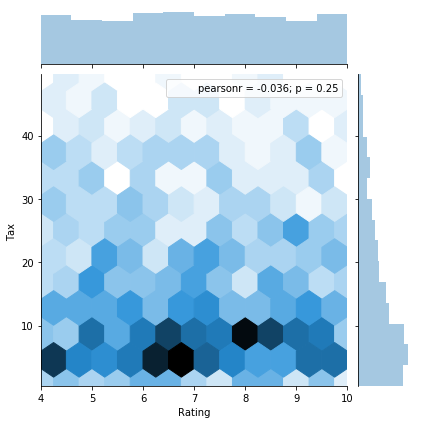

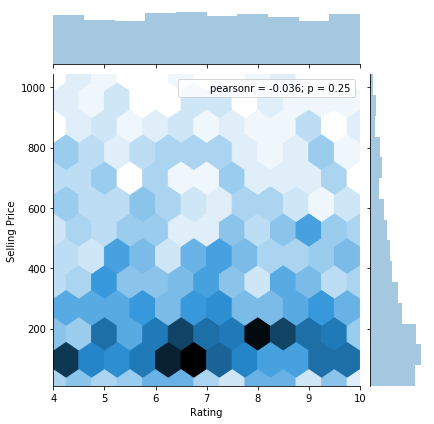

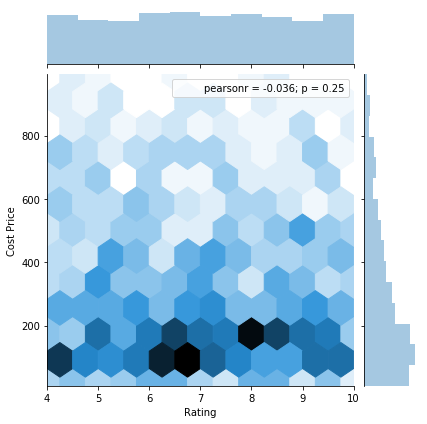

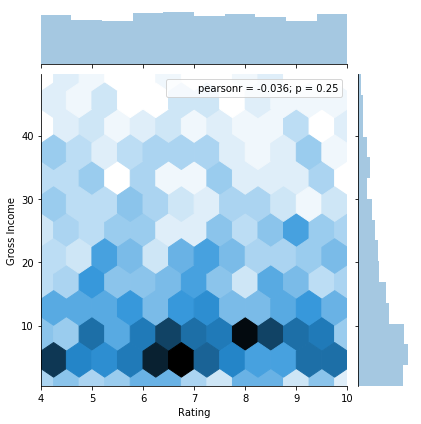

In [40]:
#create_jointplots(df, continuous_features)

For the above **hexplots**, the darker color means regions of higher concentration of data points

## Plotting FacetGrid

In [41]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='City', row='Gender')
        v.map(plt.hist, feature)

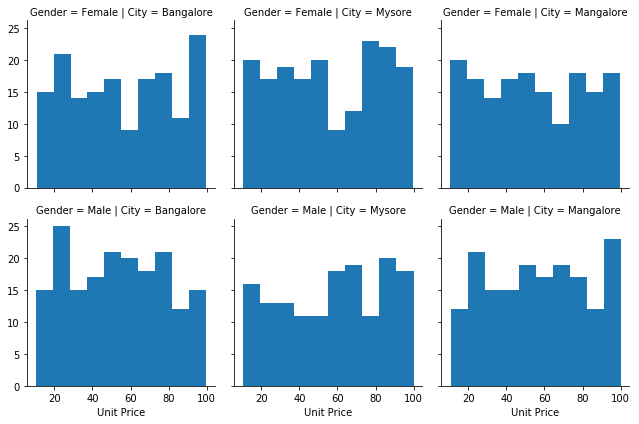

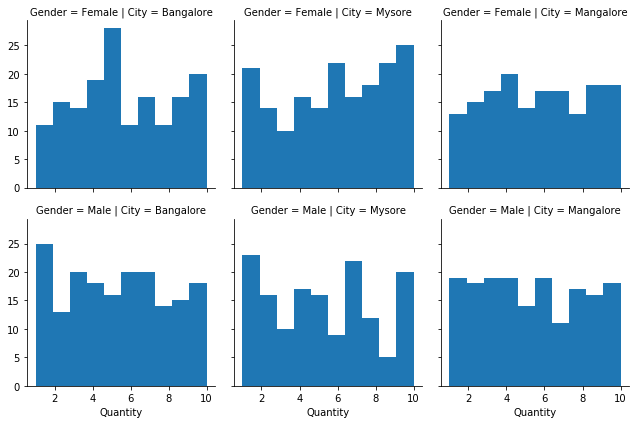

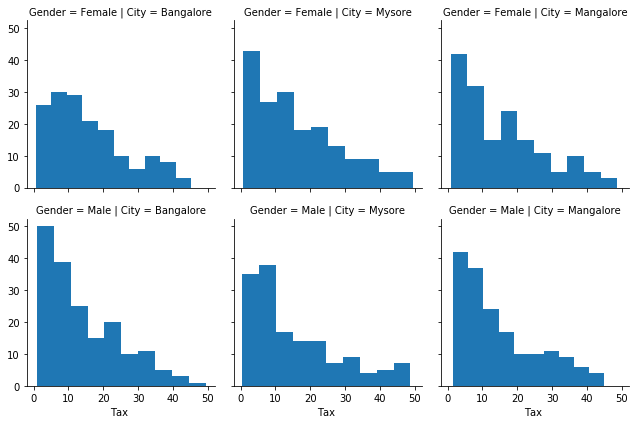

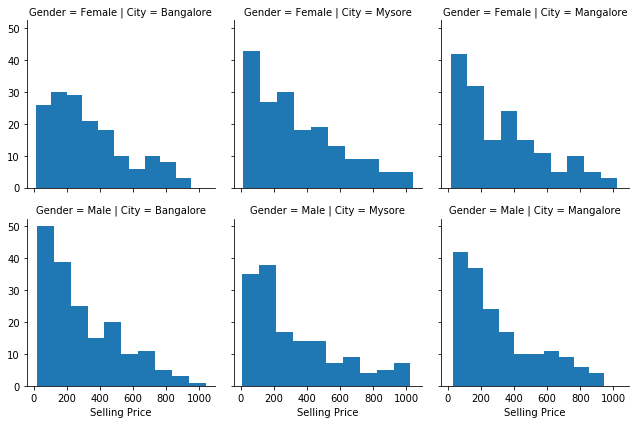

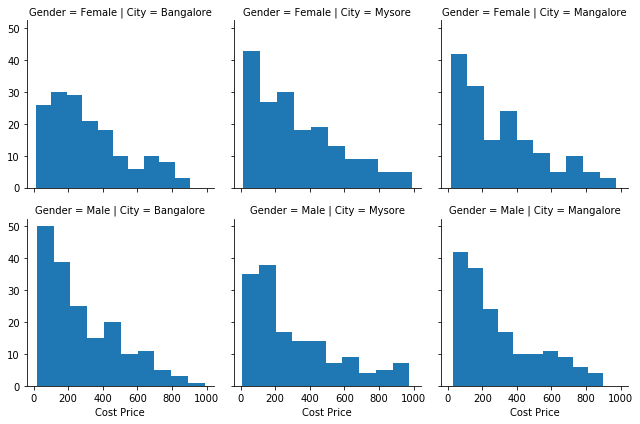

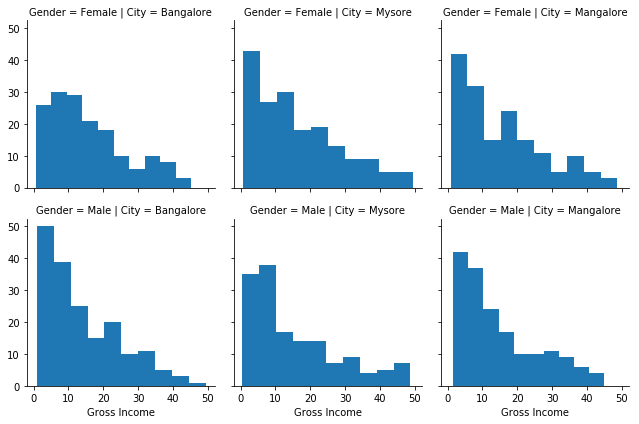

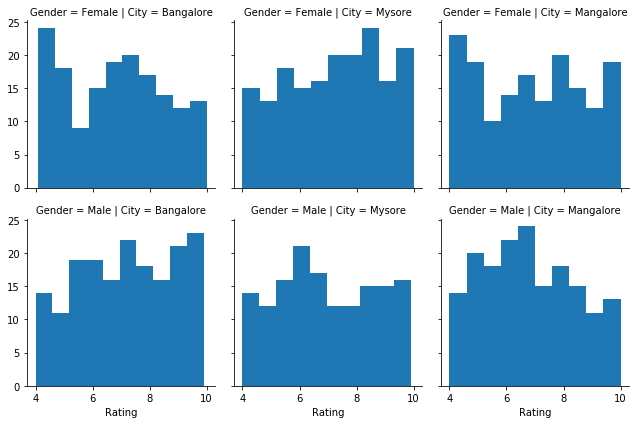

In [42]:
create_FacetGrid(df, continuous_features)

### Determine the mean and median values of the respective attributes between males and females

In [45]:
pd.pivot_table(df, index='Gender', values=continuous_features, aggfunc=['mean', 'median'])

mean                                                            \
        Cost Price Gross Income  Quantity    Rating Selling Price       Tax    
Gender                                                                         
Female  319.138723    15.956936  5.726547  6.964471    335.095659  15.956936   
Male    295.989739    14.799487  5.292585  6.980962    310.789226  14.799487   

                      median                                             \
       Unit Price Cost Price Gross Income Quantity Rating Selling Price   
Gender                                                                    
Female  55.263952      259.6        12.98        6    7.1        272.58   
Male    56.081944      232.6        11.63        5    6.9        244.23   

                          
         Tax  Unit Price  
Gender                    
Female  12.98      54.07  
Male    11.63      56.50

From the above pivot table, it can be concluded that 

 - Females purchase more expensive items than males 
 
 - **Gross Income** and **Quantity of products purchased** is nearly the same for males and females
 
 - The **Rating** given by males and females is in a very similar range

In [48]:
df.groupby(['Gender','Product Type'])[['Product Type']].count().sort_values(['Gender']).rename(columns={'Product Type':'Count'})

Count
Gender Product Type                 
Female Electronic accessories     84
       Fashion accessories        96
       Food and beverages         90
       Health and beauty          64
       Home and lifestyle         79
       Sports and travel          88
Male   Electronic accessories     86
       Fashion accessories        82
       Food and beverages         84
       Health and beauty          88
       Home and lifestyle         81
       Sports and travel          78

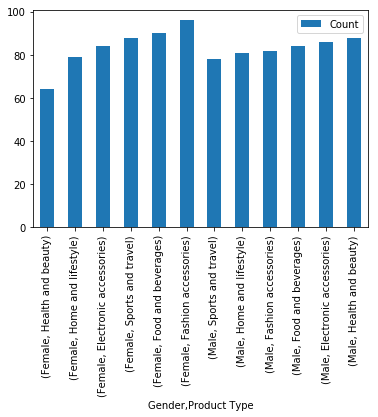

In [55]:
df.groupby(['Gender','Product Type'])[['Product Type']].count().sort_values(['Gender', 'Product Type']).rename(columns={'Product Type':'Count'}).plot(kind='bar')

The above result shows count of **males** and **females** who purchased a particular kind of a product

In [49]:
df.groupby(['Gender', 'City'])[['City']].count().sort_values(['Gender','City']).rename(columns={'City':'Count'})

Count
Gender City            
Female Bangalore    161
       Mangalore    162
       Mysore       178
Male   Mysore       150
       Mangalore    170
       Bangalore    179

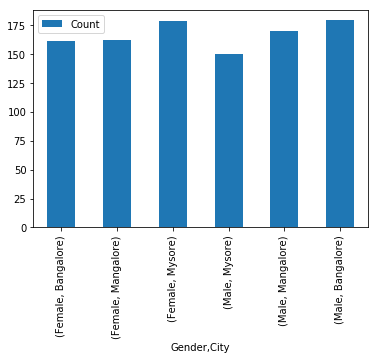

In [56]:
df.groupby(['Gender', 'City'])[['City']].count().sort_values(['Gender','City']).rename(columns={'City':'Count'}).plot(kind='bar')

The above result shows count of **males** and **females** customers spread over different cities including **Bangalore**, **Mangalore** and **Mysore**

In [46]:
df.groupby(['Gender', 'City', 'Product Type'])[['Product Type']].count().sort_values(['Gender','City']).rename(columns={'Product Type':'Count'})

Count
Gender City      Product Type                 
Female Bangalore Electronic accessories     28
                 Fashion accessories        28
                 Food and beverages         23
                 Health and beauty          21
                 Home and lifestyle         32
                 Sports and travel          29
       Mangalore Electronic accessories     28
                 Fashion accessories        33
                 Food and beverages         29
                 Health and beauty          20
                 Home and lifestyle         22
                 Sports and travel          30
       Mysore    Electronic accessories     28
                 Fashion accessories        35
                 Food and beverages         38
                 Health and beauty          23
                 Home and lifestyle         25
                 Sports and travel          29
Male   Bangalore Electronic accessories     32
                 Fashion accessories        23
                 Food and beverages         35
                 Health and beauty          26
                 Home and lifestyle         33
                 Sports and travel          30
       Mangalore Electronic accessories     27
                 Fashion accessories        29
                 Food and beverages         21
                 Health and beauty          33
                 Home and lifestyle         28
                 Sports and travel          32
       Mysore    Electronic accessories     27
                 Fashion accessories        30
                 Food and beverages         28
                 Health and beauty          29
                 Home and lifestyle         20
                 Sports and travel          16

The above result shows count of **males** and **females** customers belonging to different cities who purchased different kinds of products

In [51]:
df.groupby(['Gender', 'Payment Type'])[['Payment Type']].count().sort_values(['Gender','Payment Type']).rename(columns={'Payment Type':'Count'})

Count
Gender Payment Type       
Female Debit card      160
       Credit card     163
       Cash            178
Male   Credit card     148
       Cash            166
       Debit card      185

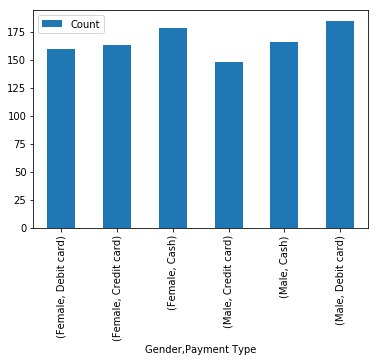

In [57]:
df.groupby(['Gender', 'Payment Type'])[['Payment Type']].count().sort_values(['Gender','Payment Type']).rename(columns={'Payment Type':'Count'}).plot(kind='bar')

The above result shows count of **males** and **females** customers using different modes of payment like **Debit card**, **credit card** and **Cash**

In [52]:
df.groupby(['City', 'Payment Type'])[['Payment Type']].count().sort_values(['City','Payment Type']).rename(columns={'Payment Type':'Count'})

Count
City      Payment Type       
Bangalore Credit card     104
          Cash            110
          Debit card      126
Mangalore Credit card     109
          Cash            110
          Debit card      113
Mysore    Credit card      98
          Debit card      106
          Cash            124

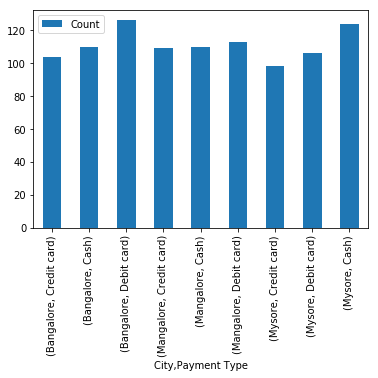

In [58]:
df.groupby(['City', 'Payment Type'])[['Payment Type']].count().sort_values(['City','Payment Type']).rename(columns={'Payment Type':'Count'}).plot(kind='bar')

The above result shows count of customers belonging to different cities using different modes of payment like **Debit card**, **credit card** and **Cash**